Avaliação de Modelos parte II SVM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import *
import matplotlib.pyplot as plt 

In [2]:
#dados de concessão de crédito
credito = pd.read_csv('Credit3.csv', sep=";")
credito.head()

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


In [3]:
#contamos a classe
credito.groupby(['class'])['class'].count()

class
0    300
1    700
Name: class, dtype: int64

In [4]:
#separação de previsões de classe
previsores = credito.iloc[:,1:10].values
classe = credito.iloc[:,10].values
previsores

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [5]:
#label encoding de atributos categóricos
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])

In [6]:
#separamos em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 123)

In [7]:
#modelo svm
modelosvn = svm.SVC(decision_function_shape='ovo')
modelosvn.fit(X_treinamento, y_treinamento)

SVC(decision_function_shape='ovo')

In [8]:
#previsoes e matriz de confusão
previsoes_svn = modelosvn.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes_svn)
confusao

array([[ 12,  88],
       [  6, 194]], dtype=int64)

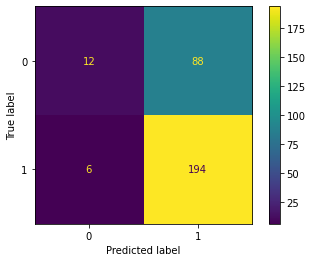

In [9]:
#matriz de confusão gráfica
plot_confusion_matrix(modelosvn, X_teste, y_teste)

In [10]:
#acurácia
acuracia = accuracy_score(y_teste, previsoes_svn)
print(acuracia)

0.6866666666666666


In [11]:
#erro
erro = 1 - acuracia
print(erro)

0.31333333333333335


In [12]:
#recall, ele nos diz de todos os bons pagadores de creditos, quantos foram classificados corretamente como bom
recall = recall_score(y_teste, previsoes_svn) 
print(recall)

0.97


In [13]:
#precisao, ele nos mostra dos que classificamos como bom, quantos de fato eram bons
precision = precision_score(y_teste, previsoes_svn) 
print(precision)

0.6879432624113475


In [14]:
#f1, é uma media armonica entre precision e recall, o valor entre 0 a 1, o objetivo é maximizar ele
f1 = f1_score(y_teste, previsoes_svn) 
print(f1)

0.8049792531120332


In [15]:
#auc
auc = roc_auc_score(y_teste, previsoes_svn) 
print(auc)

0.545


In [16]:
#usado principalmente qdo tem multiplas classe, ele penaliza o erro, objetivo de minimizar 
log = log_loss(y_teste, previsoes_svn) 
print(log)

10.822384485651538


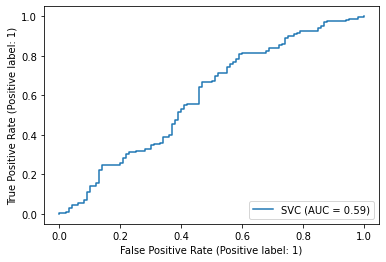

In [17]:
plot_roc_curve(modelosvn, X_teste, y_teste) 